# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [65]:
NAME = "Luk Letif"
COLLABORATORS = ""

---

# Part 2: (65 pts)

## Question 1: Multi-Class Classification and Evaluation Metrics (20 points)

In this question, you are tasked with training a multi-class classification model using the [Digits dataset](https://scikit-learn.org/stable/datasets/index.html#digits-dataset), a dataset included in scikit-learn. This dataset contains 1797 8x8 images, meaning that each image is an 8x8 matrix of pixels, and each pixel is an integer value between 0 and 16. Each image is labeled with the digit it represents, from 0 to 9.
### Tasks

1. **Load the Data (5 pts):**
   Load the Digits dataset from scikit-learn's included datasets. Split the data into a training set (70%) and a test set (30%).
   
3. **Train a Model (5 pts):**
   Train a multi-class Logistic Regression on the training data. 

4. **Evaluate the Model (5 pts):**
   Predict the classes of the test set and calculate the F1 score for each class (in the f1 function, use `average=None`). Provide the F1 score for each class in the test set.

5. **Class Report (5 pts):**
   Generate a classification report to evaluate the performance of your model. The report should include precision, recall, and F1 score for each class.

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Loading the dataset
# YOUR CODE HERE
# raise NotImplementedError()
#Load the Digits dataset from scikit-learn's included datasets. Split the data into a training set (70%) and a test set (30%).
digits_dataset = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits_dataset.target, test_size=0.3, random_state=42)

In [67]:
# 5 points. Load data into X and y matrices
def test_data_split():
    assert X_train.shape == (1257, 64), f"Expected (1257, 64), but got {X_train.shape}"
    assert X_test.shape == (540, 64), f"Expected (540, 64), but got {X_test.shape}"
    assert y_train.shape == (1257,), f"Expected (1257,), but got {y_train.shape}"
    assert y_test.shape == (540,), f"Expected (540,), but got {y_test.shape}"

test_data_split()

In [68]:
# Training a logistic regression model
# YOUR CODE HERE
# raise NotImplementedError()
#Train a multi-class Logistic Regression on the training data.
clf = LogisticRegression(max_iter=5000)  
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [69]:
# 5 pts
def test_model_training():
    assert clf.coef_.shape == (10, 64), f"Expected coefficient shape (10, 64), but got {clf.coef_.shape}"
    assert clf.intercept_.shape == (10,), f"Expected intercept shape (10,), but got {clf.intercept_.shape}"
    assert set(clf.classes_) == set(range(10)), f"Expected classes {set(range(10))}, but got {set(clf.classes_)}"

test_model_training()

In [70]:
# Predicting the classes of the test set
# YOUR CODE HERE
# raise NotImplementedError()
#Predict the classes of the test set and calculate the F1 score for each class (in the f1 function, use average=None). Provide the F1 score for each class in the test set.
y_pred = clf.predict(X_test)
f1_scores = f1_score(y_test, y_pred, average=None)
# print("F1 scores for each class in the test set:", f1_scores)

In [71]:
# 5 pts
def test_model_evaluation():
    assert y_pred.shape == (540,), f"Expected (540,), but got {y_pred.shape}"
    assert len(f1_scores) == 10, f"Expected 10 F1 scores, but got {len(f1_scores)}"
    for score in f1_scores:
        assert score >= 0 and score <= 1, f"F1 score {score} is out of range"

test_model_evaluation()

In [72]:
# Generating a classification report
# YOUR CODE HERE
# raise NotImplementedError()

# Generate a classification report to evaluate the performance of your model. The report should include precision, recall, and F1 score for each class.
class_report = classification_report(y_test, y_pred)
print(f"F1 Scores for each class: {f1_scores}")
print("\nClassification Report:")
print(class_report)

F1 Scores for each class: [1.         0.94949495 0.97916667 0.97196262 0.99159664 0.94736842
 0.98113208 0.99082569 0.94382022 0.96551724]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.98      0.99        60
           5       0.94      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.91      0.98      0.94        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [73]:
# 5 pts
def test_class_report():
    lines = class_report.strip().split("\n")
    assert len(lines) == 16, f"Expected 16 lines in classification report, but got {len(lines)}"
    assert "precision" in lines[0] and "recall" in lines[0] and "f1-score" in lines[0], "Header of classification report is missing or incorrect"
    assert 'accuracy' in lines[-3], "Accuracy line in classification report is missing or incorrect"
    
test_class_report()

## Question 2: ROC and AUC for Multi-Class Classification (20 points)

### Problem Statement

Continuing from Question 1, you will now evaluate your trained multi-class classification model in more detail. In this question, you are required to compute and plot the ROC curves for each class and calculate the Area Under the Curve (AUC) values using the `load_digits` dataset.

### Tasks

1. **Compute ROC and AUC (10 pts):**
   Compute the ROC curves and AUC values for each class in the test set. You might need to binarize the labels for this task. Look up the use of `label_binarize` for the task

2. **Plot ROC Curves (5 pts):**
   Plot the ROC curves for all classes on a single graph. Make sure each class is represented by a curve of a different color, and include a legend indicating which class each curve corresponds to.

3. **Analysis (5 pts):**
   Analyze and interpret the AUC values and ROC curves of each class. What does it tell you about your model's performance for different classes?

In [74]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# YOUR CODE HERE
# raise NotImplementedError()
n_classes = 10 #TODO

y_bin_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_bin_pred = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_bin_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [75]:
## 10 pts
def test_roc_and_auc():
    assert len(fpr) == n_classes, f"Expected {n_classes} fpr arrays, but got {len(fpr)}"
    assert len(tpr) == n_classes, f"Expected {n_classes} tpr arrays, but got {len(tpr)}"
    assert len(roc_auc) == n_classes, f"Expected {n_classes} AUC values, but got {len(roc_auc)}"
    for i in range(n_classes):
        assert fpr[i].shape == tpr[i].shape, f"Shape mismatch between fpr and tpr for class {i}"
        assert 0 <= roc_auc[i] <= 1, f"AUC for class {i} is out of range"

test_roc_and_auc()

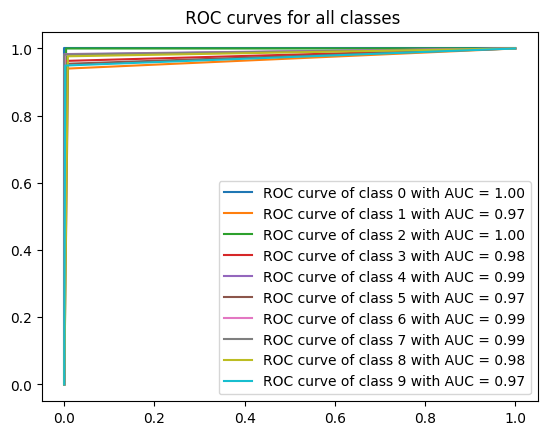

In [76]:
# 5 pts
# Plotting the ROC curves
# Print AUC values for each class

# YOUR CODE HERE
# raise NotImplementedError()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} with AUC = {roc_auc[i]:.2f}')
plt.title(' ROC curves for all classes')
plt.legend(loc="lower right")
plt.show()

***Analysis (5 pts)***
Analyze and interpret the AUC values and ROC curves of each class. What does it tell you about your model's performance for different classes?

They all performs well. class o and 2 is perfect, then it is 4,6,7. 3 and 8 has the same accuracy. Bottom ones are 1,5,9.

## Question 3: Regularization Path of L2 Regularization (20 points)

### Problem Statement

In this question, you are required to analyze the effect of L2 regularization on the logistic regression model that you trained in Question 1. Specifically, you will examine how the weights associated with the features change as the strength of regularization is varied. This is often referred to as the regularization path. 

The regularization path shows the coefficients of the features for many values of the regularization parameter. In the context of L2 regularization, it helps to visualize how increasing the regularization strength pushes the coefficients towards zero, offering insight into the model's complexity and potential overfitting or underfitting issues.

### Tasks

1. **Compute Regularization Path (10 pts):**
   Train logistic regression models to predict whether the digit is '3' or not, with varying values of the L2 regularization parameter (e.g., `C` in scikit-learn’s implementation, where `C` is the inverse of regularization strength, smaller values specify stronger regularization). Collect the coefficients of the features for each value of the regularization parameter. Create a variable `regularization_strengths` that in log space goes from -4 to 4 in 12 steps.

2. **Plot Regularization Path (5 pts):**
   Plot the regularization path, showing how the coefficients change with different regularization strengths. Label the axes appropriately and provide a legend to distinguish different features if necessary.

The plot should look something like this:
![](./regularization_path.png)

3. **Analysis (5 pts):**
   Analyze the plot. How do the coefficients change as the regularization strength increases? What does this tell you about the influence of L2 regularization on the model parameters?

In [77]:
import numpy as np

# YOUR CODE HERE
# raise NotImplementedError()

#Load the Digits dataset from scikit-learn's included datasets.
digits_dataset = datasets.load_digits()
# X_train, X_test, y_train, y_test = train_test_split(digits.data, digits_dataset.target, test_size=0.3, random_state=42)

# Set up binary target for the digit '3'
target_3 = np.where(digits_dataset.target == 3, 1, 0)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(digits_dataset.data, target_3, test_size=0.3, random_state=42)

# Create a variable `regularization_strengths` that in log space goes from -4 to 4 in 12 steps.
regularization_strengths = np.logspace(-4, 4, 12)

coefficients = []
#  where `C` is the inverse of regularization strength
for C in regularization_strengths:
    log_reg = LogisticRegression(penalty='l2', C=C, max_iter=2000) #TODO; set the maximum iterations >=1000
    log_reg.fit(X_train, y_train)
    coefficients.append(log_reg.coef_[0][:12])  # TODO: append only the first 12. 

coefficients = np.array(coefficients)

In [78]:
# 10 pts
def test_regularization_path():
    assert coefficients.shape[1] == len(regularization_strengths), "Mismatch in the number of coefficient sets and regularization strengths"
    for coef in coefficients:
        assert coef.shape == (12,), f"Expected coefficient shape (12,), but got {coef.shape}"

test_regularization_path()

In [79]:
# for i in range(10):
#     plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')
# plt.title(' ROC curves for all classes')
# plt.legend(loc="lower right")
# plt.show()

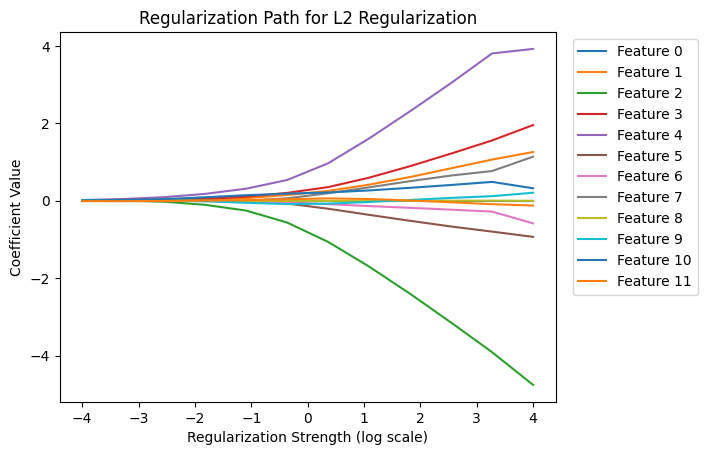

In [80]:
# 5 pts
# YOUR CODE HERE
# raise NotImplementedError()
for i in range(coefficients.shape[1]):
    plt.plot(np.log10(regularization_strengths), coefficients[:, i], label=f'Feature {i}')

plt.xlabel('Regularization Strength (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Regularization Path for L2 Regularization')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

**Analysis (5 pts):**
Analyze the plot. How do the coefficients change as the regularization strength increases? What does this tell you about the influence of L2 regularization on the model parameters?

Coefficients decreases change as the regularization strength increases. Which means L2 regularization  penalizes large coefficients. 